<a href="https://colab.research.google.com/github/thejapamarthy/Python/blob/main/Analysis_on_NYC_School_Enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# reading the dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the dataset into a dataframe
df=pd.read_csv('/content/drive/MyDrive/School_Demography.csv', low_memory=False)
df.describe()
df

,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty
count,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.00000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.00000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000
mean,594.417507,16.722934,44.674121,46.177802,46.371693,46.143987,45.639760,44.621762,42.95255,42.080720,41.596673,49.482138,48.903736,39.896646,39.152986,288.347696,48.263022,306.050450,51.734470,95.04036,11.225389,156.389146,32.077038,241.236706,42.263431,14.295609,2.421325,87.455686,12.013662,119.976002,22.563567,83.013090,13.770303,433.473684,75.354595
std,481.001320,44.591993,52.491434,54.020697,54.886408,56.386409,57.566568,56.815895,88.53544,89.014787,89.618776,132.791808,150.554559,108.336076,104.001061,241.405018,9.496147,254.333104,9.496319,218.99787,16.503581,168.606172,26.970674,228.979094,25.106645,20.957895,2.663279,184.380362,18.066895,96.223338,15.794186,112.282573,13.961621,346.266697,19.837797
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.900000
25%,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.000000,46.200000,164.500000,48.700000,5.00000,1.300000,43.000000,8.500000,87.000000,19.500000,3.000000,0.800000,6.000000,1.400000,64.000000,15.400000,18.000000,4.400000,233.000000,68.300000
50%,477.000000,0.000000,32.000000,33.000000,33.000000,28.000000,19.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,48.800000,248.000000,51.200000,16.00000,3.900000,107.000000,25.400000,182.000000,39.600000,8.000000,1.600000,15.000000,3.100000,97.000000,19.900000,45.000000,9.700000,353.000000,80.700000
75%,699.000000,31.000000,78.000000,82.000000,83.000000,83.000000,83.000000,80.000000,64.00000,62.000000,60.000000,68.000000,70.000000,55.000000,53.500000,349.000000,51.300000,365.000000,53.800000,77.00000,13.500000,202.000000,51.150000,313.000000,63.000000,16.000000,2.900000,78.000000,14.200000,144.000000,25.100000,102.000000,18.200000,523.000000,89.500000
max,5838.000000,1158.000000,344.000000,337.000000,330.000000,349.000000,376.000000,351.000000,771.00000,789.000000,768.000000,1551.000000,3832.000000,1450.000000,1327.000000,2360.000000,100.000000,3478.000000,100.000000,3576.00000,94.400000,1382.000000,96.300000,1968.000000,100.000000,293.000000,31.000000,3104.000000,93.300000,925.000000,100.000000,1168.000000,100.000000,3548.000000,100.000000


In [ ]:
#finding the minimum and maximum enrollment in schools
min=df['Total Enrollment'].min() # min value in the Created Date Column
max=df['Total Enrollment'].max() # max value in the Created Date Column
print(min)
print(max)
df['DBN']=df['DBN'].astype('string')
df['Economic Need Index']=pd.to_numeric(df['Economic Need Index'])#changing datatype of Economic Need Index
#df['Economic Need Index'].astype('str').astype('int64')
df.info()
df['Economic Need Index']


12
5838
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DBN                                         3667 non-null   string 
 1   School Name                                 3667 non-null   object 
 2   Year                                        3667 non-null   object 
 3   Total Enrollment                            3667 non-null   int64  
 4   Grade PK (Half Day & Full Day)              3667 non-null   int64  
 5   Grade K                                     3667 non-null   int64  
 6   Grade 1                                     3667 non-null   int64  
 7   Grade 2                                     3667 non-null   int64  
 8   Grade 3                                     3667 non-null   int64  
 9   Grade 4                                     3667 non-null   int64  
 10  Grad

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3662   NaN
3663   NaN
3664   NaN
3665   NaN
3666   NaN
Name: Economic Need Index, Length: 3667, dtype: float64

Minimum enrollment: 12
Maximum enrollment: 5838

In [ ]:
df['Boro']=df.DBN.str[2]#creating new column Boro with codenames
df['Boro']
df.head()
df.loc[(df.Boro == "M"),'Boro']="Manhattan" #replacing the boro code for name
df.loc[(df.Boro == 'R'),'Boro']='Staten Island'
df.loc[(df.Boro == 'X'),'Boro']='Bronx'
df.loc[(df.Boro == 'K'),'Boro']='Brooklyn'
df.loc[(df.Boro == 'Q'),'Boro']='Queens'
df
#df['Boro'] = df['DBN'].str.split('',expand=True)
#df['Boro']


,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Boro
0,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,NaN,Manhattan
1,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,NaN,Manhattan
2,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,34,0,0,0,0,0,0,0,127,46.9,144,53.1,24,8.9,51,18.8,180,66.4,1,0.4,15,5.5,88,32.5,9,3.3,207,76.4,NaN,Manhattan
3,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,42,0,0,0,0,0,0,0,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,NaN,Manhattan
4,01M020,P.S. 020 Anna Silver,2016-17,540,41,83,83,92,95,77,69,0,0,0,0,0,0,0,265,49.1,275,50.9,175,32.4,52,9.6,264,48.9,22,4.1,27,5.0,116,21.5,93,17.2,315,58.3,NaN,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,84X717,Icahn Charter School,2017-18,329,0,40,41,40,41,38,34,32,33,30,0,0,0,0,175,53.2,154,46.8,4,1.2,164,49.8,159,48.3,2,0.6,0,0.0,24,7.3,24,7.3,277,84.2,NaN,Bronx
3663,84X718,Bronx Charter School for Better Learning,2016-17,551,18,103,102,103,95,67,63,0,0,0,0,0,0,0,286,51.9,265,48.1,9,1.6,472,85.7,54,9.8,7,1.3,9,1.6,47,8.5,14,2.5,443,80.4,NaN,Bronx
3664,84X718,Bronx Charter School for Better Learning,2017-18,554,18,77,102,101,100,94,62,0,0,0,0,0,0,0,289,52.2,265,47.8,9,1.6,471,85.0,54,9.7,11,2.0,9,1.6,45,8.1,11,2.0,445,80.3,NaN,Bronx
3665,84X730,Bronx Charter School for the Arts,2016-17,320,0,53,53,55,52,53,52,2,0,0,0,0,0,0,168,52.5,152,47.5,2,0.6,76,23.7,236,73.8,3,0.9,3,0.9,67,20.9,51,15.9,235,73.4,NaN,Bronx


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



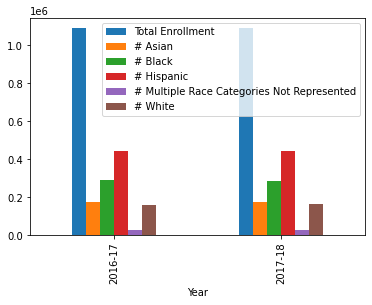

In [ ]:
#grouping by year to compare enrollment data
dfnew=df.groupby(by=['Year'],as_index=False)['Total Enrollment','# Asian','# Black','# Hispanic','# Multiple Race Categories Not Represented','# White'].sum()
dfnew
import matplotlib.pyplot as plt
dfnew.plot(x="Year", y=["Total Enrollment","# Asian","# Black","# Hispanic","# Multiple Race Categories Not Represented","# White"], kind="bar")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



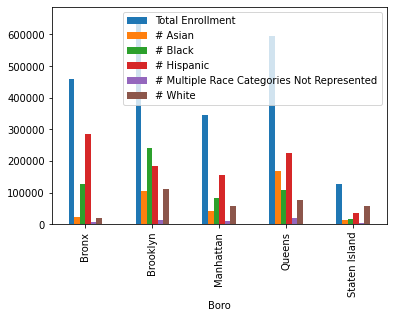

In [ ]:
#groupby boro and compare enrollment across boros and races
dfboro=df.groupby(by=['Boro'],as_index=False)['Total Enrollment','# Asian','# Black','# Hispanic','# Multiple Race Categories Not Represented','# White'].sum()
dfboro
import matplotlib.pyplot as plt
dfboro.plot(x="Boro", y=["Total Enrollment","# Asian","# Black","# Hispanic","# Multiple Race Categories Not Represented","# White"], kind="bar")
plt.show()

According to the hypothesis, the expectation is Manhattan to have highest total enrollment and Bronx to have highest enrollment of Black students. But the findings show that Brooklyn has highest enrollment in both cases whereas Queens has the highest enrollment of Asians- understandably as Queens seems has a higher concentration of Asian population.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



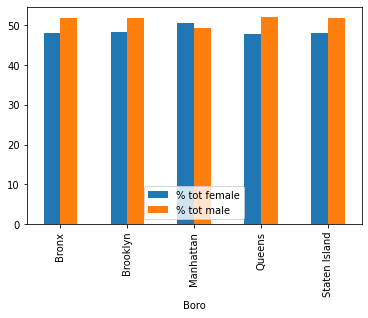

In [ ]:
#displaying the schools dem data in the boroughs with percentage of girls enrollment greater than 
dfboroper=df.groupby(by=['Boro'],as_index=False)['Total Enrollment','# Female', '# Male'].sum()
dfboroper
dfboroper['% tot female']=(dfboroper["# Female"]/dfboroper["Total Enrollment"])*100
dfboroper['% tot male']=(dfboroper["# Male"]/dfboroper["Total Enrollment"])*100
dfboroper
import matplotlib.pyplot as plt
dfboroper.plot(x="Boro", y=["% tot female","% tot male"], kind="bar")
plt.show()
                                    



While the male total enrollment percentage is greater than 50 in most of the boroughs, female enrollment is less than 50 in all borough except Manhattan.

In [ ]:
#regressing poverty on total enrollment for both the year 2016-2017
df2017= df.loc[df['Year']=="2016-17"]
df2017
df
#df2017 = df2017[df2017['Economic Need Index'].notna()]
#df2017['Economic Need Index']
import plotly.express as px
fig = px.scatter(df2017, x="# Poverty", y="Total Enrollment",trendline="ols")
fig.show()


In [ ]:
#regressing poverty on enrollment for year 2017-2018
df2018= df.loc[df['Year']=="2017-18"]
df2018
df
#df2018 = df2018[df2018['Economic Need Index'].notna()]
#df2018['Economic Need Index']
import plotly.express as px
fig = px.scatter(df2018, x="# Poverty", y="Total Enrollment",trendline="ols")
fig.show()


For both the regression analyses, we find that the relationship between poverty and total enrollment is positive and significant (less strong)